# Introducción a herramientas para Ciencia de Datos - Pandas

In [44]:
import datetime 
import numpy as np
import pandas as pd
from sodapy import Socrata

client = Socrata("www.datos.gov.co", None)

results = client.get("ha6j-pa2r", limit=200)

# Convert to pandas DataFrame
datosX = pd.DataFrame.from_records(results)

datos = pd.read_json("https://www.datos.gov.co/resource/ha6j-pa2r.json")

datos.head()


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etar_o,descripci_n_conducta,cantidad
0,ANTIOQUIA,COPACABANA,5212000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
1,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,2
2,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
3,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
4,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1


In [45]:
datos.shape


(1000, 9)

In [46]:
datos.dtypes

departamento            object
municipio               object
codigo_dane              int64
armas_medios            object
fecha_hecho             object
genero                  object
grupo_etar_o            object
descripci_n_conducta    object
cantidad                 int64
dtype: object

In [47]:
#¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?
datos1 = datos[['departamento','cantidad']]
datos1 = (datos1.groupby(['departamento'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())
datos1
#Podemos ver que los departamentos con mas Homicidios en la historia de estos datos son 
# 1)VALLE           209
# 2)ANTIOQUIA	    157    
# 3)CUNDINAMARCA    105

,departamento,cantidad
0,VALLE,209
1,ANTIOQUIA,157
2,CUNDINAMARCA,105
3,ATLÁNTICO,45
4,CAUCA,40
5,SANTANDER,34
6,CÓRDOBA,33
7,RISARALDA,33
8,BOLÍVAR,31
9,NORTE DE SANTANDER,30


     departamento fecha_hecho  cantidad
0           VALLE   1/01/2010        20
1           VALLE   3/01/2010        19
2    CUNDINAMARCA   1/01/2010        18
3           VALLE  16/01/2010        17
4           VALLE  17/01/2010        16
..            ...         ...       ...
318       GUAJIRA  12/01/2010         1
319       GUAJIRA  13/01/2010         1
320       GUAJIRA   4/01/2010         1
321       GUAJIRA   9/01/2010         1
322       VICHADA  14/01/2010         1

[323 rows x 3 columns]


<AxesSubplot:>

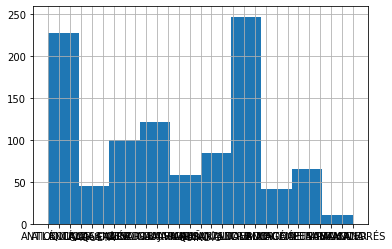

In [48]:
#1. ¿Cuáles han sido los departamentos (TOP 3) más afectados en el último año?
datos1 = datos[['departamento','cantidad','fecha_hecho']]
datos2 = (datos1.groupby(['departamento','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

print (datos2)
datos['departamento'].hist()

#Podemos ver que los departamentos con mas Homicidios en el último año de estos datos son:
# 1)VALLE           56
# 2)CUNDINAMARCA	34    
# 3)ANTIOQUIA       12

In [49]:
#2.¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?
armas_medios_emp_num =  datos.groupby('armas_medios')['armas_medios'].count().sort_values(ascending=False)
print(armas_medios_emp_num)
# El arma mas común para cometer Homicidios son las ARMA DE FUEGO .

armas_medios
ARMA DE FUEGO                         577
VEHICULO                              176
ARMA BLANCA / CORTOPUNZANTE           138
MOTO                                   69
CONTUNDENTES                           14
PUNZANTES                               4
BICICLETA                               3
MINA ANTIPERSONA                        3
CUERDA/SOGA/CADENA                      3
CORTANTES                               2
ARTEFACTO EXPLOSIVO/CARGA DINAMITA      2
GRANADA DE MANO                         2
MOTO BOMBA                              2
NO REPORTADO                            2
BOLSA PLASTICA                          1
COMBUSTIBLE                             1
SIN EMPLEO DE ARMAS                     1
Name: armas_medios, dtype: int64


      genero grupo_etar_o  cantidad
0  MASCULINO      ADULTOS       859
1   FEMENINO      ADULTOS        89
2  MASCULINO  ADOLECENTES        44
3  MASCULINO      MENORES        12
4   FEMENINO  ADOLECENTES         8
5   FEMENINO      MENORES         4


<AxesSubplot:>

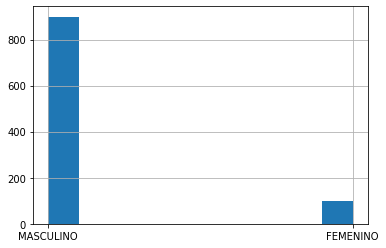

In [50]:
#3. ¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?
datos3 = (datos.groupby(['genero','grupo_etar_o'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index()
               )
               

datos3 =datos3.drop(['codigo_dane'],axis=1)
print(datos3)
datos['genero'].hist()


#La proporcion de homicidios es de 10 hombres por 1 mujer. La  mayoria de homicidios cometidos fueron realizados por hombres adultos con 859 homicidios tambien varia en incremento durante los ultimos años.


       genero grupo_etar_o fecha_hecho  cantidad
0   MASCULINO      ADULTOS   1/01/2010        91
1   MASCULINO      ADULTOS  17/01/2010        75
2   MASCULINO      ADULTOS  16/01/2010        59
3   MASCULINO      ADULTOS  10/01/2010        55
4   MASCULINO      ADULTOS   9/01/2010        54
..        ...          ...         ...       ...
69   FEMENINO      MENORES  12/01/2010         1
70   FEMENINO      ADULTOS   6/01/2010         1
71   FEMENINO      ADULTOS  15/01/2010         1
72   FEMENINO  ADOLECENTES  16/01/2010         1
73  MASCULINO      MENORES   8/01/2010         1

[74 rows x 4 columns]


<AxesSubplot:>

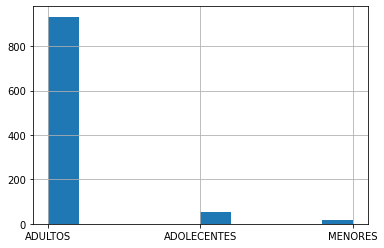

In [ ]:
#3. ¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?
datos4 = (datos.groupby(['genero','grupo_etar_o','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())
               
datos4 =datos4.drop(['codigo_dane'],axis=1)
print(datos4)
datos['grupo_etar_o'].hist()

#La proporcion de homicidios es de 10 hombres por 1 mujer. La  mayoria de homicidios cometidos fueron realizados por hombres adultos con 859 homicidios tambien varia en incremento durante los ultimos años.

[]

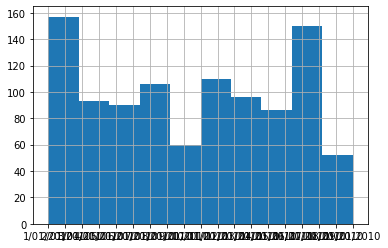

In [ ]:
#4. ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?
datos6 = (datos.groupby(['descripci_n_conducta','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

datos6 =datos6.drop(['codigo_dane'],axis=1)
datos6['fecha_hecho'].value_counts().plot()
datos6
#En los primeros dias del año, es decir en festividades de años nuevo se evidencia un alto incremento en los homicidios siendo el dia más frecute el 1 de enero.

<AxesSubplot:>

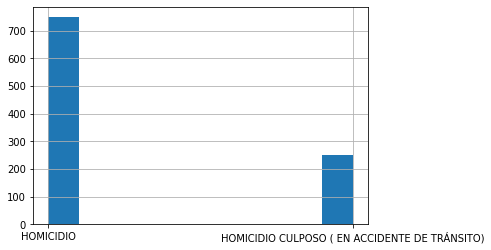

In [ ]:
#4. ¿cuáles son los delitos, descripciones o modalidades más comunes?
datos7 = (datos.groupby(['descripci_n_conducta'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

datos7 =datos7.drop(['codigo_dane'],axis=1)
datos7

datos['descripci_n_conducta'].hist()

#los delitos, descripciones o modalidades más comunes son homicidio y HOMICIDIO CULPOSO por ACCIDENTE DE TRÁNSITO)